In [ ]:
! pip install wandb -qU

In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import wandb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from NN import Classification
from Utils import *
import plotly.figure_factory as ff

c:\Users\madhe\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\madhe\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\madhe\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Importing data

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, train_size=0.8)

labels = ["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#TODO: Remove the wandb key before sharing
wandb.login(key = "39e4e3cb3e968e93d443865e4c84210177e9ada5")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: madhes23. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\madhe/.netrc


True

# Plotting sample data from each class

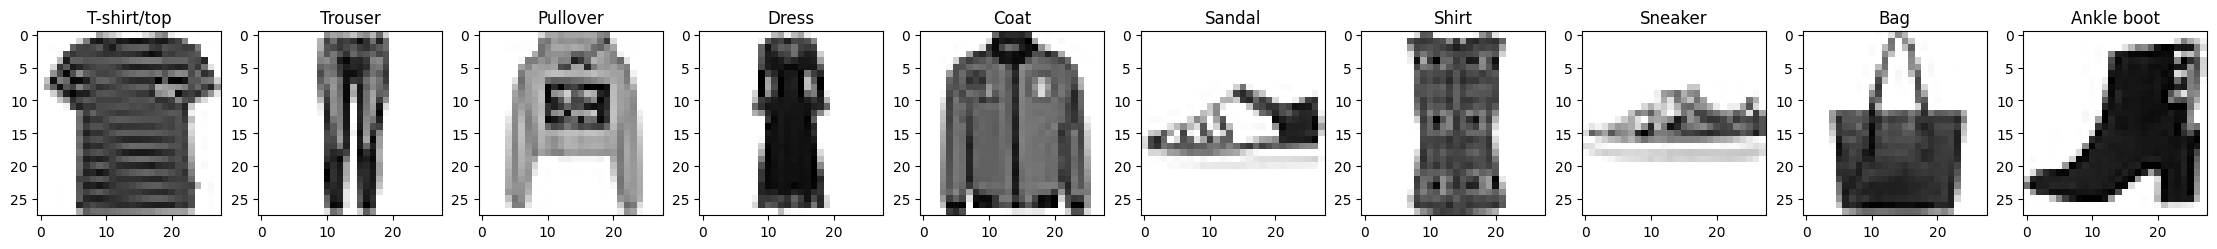

In [3]:
wandb.init(project='CS6910_Assignment-1', name='plotting-samples')

no_of_items = 10

fig, axes = plt.subplots(nrows = 1, ncols=10, figsize = (28, 28))
sample_images = []
for item in range(no_of_items):
  index = 0
  while(y_train[index] != item): #searching for the first occurance of the element
    index = index+1
  
  sample_images.append(wandb.Image(x_train[index], caption= labels[item]))

  ax = axes[item]
  ax.imshow(x_train[index], cmap='gray_r')
  ax.set_title(labels[item])

wandb.log({"Sample images from each class": sample_images})
wandb.finish()

# Reshaping for NN

In [4]:
no_of_pixels = x_train[0].size
x_train = x_train.reshape(-1, no_of_pixels)/255
x_test = x_test.reshape(-1, no_of_pixels)/255
x_validation = x_validation.reshape(-1, no_of_pixels)/255

# Models

### Model giving best accuracy in validation set

Completed epoch : 1 	 Error: 0.5472611152739041 	 Accuracy: 0.8524791666666667
Completed epoch : 2 	 Error: 0.39819045939349135 	 Accuracy: 0.8702291666666667
Completed epoch : 3 	 Error: 0.36690670954557597 	 Accuracy: 0.8793541666666667
Completed epoch : 4 	 Error: 0.3467767079111373 	 Accuracy: 0.8870208333333334
Completed epoch : 5 	 Error: 0.33144302490900224 	 Accuracy: 0.8925833333333333
Completed epoch : 6 	 Error: 0.31922688587184495 	 Accuracy: 0.8961041666666667
Completed epoch : 7 	 Error: 0.30910178363938084 	 Accuracy: 0.8994166666666666
Completed epoch : 8 	 Error: 0.3004194777256653 	 Accuracy: 0.9015625
Completed epoch : 9 	 Error: 0.29296053685861206 	 Accuracy: 0.9039375
Completed epoch : 10 	 Error: 0.28639808679700934 	 Accuracy: 0.9060416666666666
Completed epoch : 11 	 Error: 0.28051773148522596 	 Accuracy: 0.907875
Completed epoch : 12 	 Error: 0.27513931355272536 	 Accuracy: 0.9093333333333333
Completed epoch : 13 	 Error: 0.27020446884346494 	 Accuracy: 0.9113

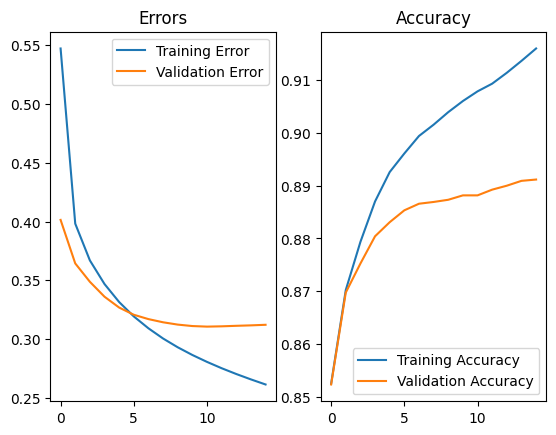

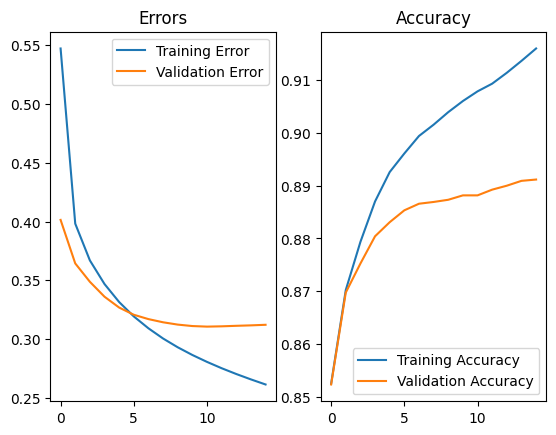

In [5]:
model_best = Classification() 
model_best.init_weight_and_bias()
tr_err, val_err, tr_acc, val_acc = model_best.fit(x_train, y_train, x_validation, y_validation)
model_best.plot_graphs(tr_err, val_err, tr_acc, val_acc)

### Accuracy in the test data

In [6]:
model_best.calc_accuracy(x_test, y_test)

0.8784

# Logging confusion matrix to WandB

In [11]:
predicted_dist = model_best.calc_accuracy(x_test, y_test, return_predicted_distribution=True)
true_values = predicted_dist.argmax(axis=1)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=true_values)
colorscale = [[0, 'rgb(255,255,255)'], 
              [0.2, 'rgb(255,0,0)'],
              [0.7, 'rgb(0,128,0)'],
              [1, 'rgb(0,128,0)']]
fig = ff.create_annotated_heatmap(conf_matrix, x=labels, y=labels, colorscale=colorscale)
fig.update_layout(title_text='Confusion matrix')
fig['data'][0]['showscale'] = True
fig.show()

#TODO: uncomment this
# wandb.init(project='CS6910_Assignment-1', name='confusion-matrix-plot-final')
# wandb.log({'confusion_matrix': fig})
# wandb.finish()

# MSE vs Cross Entropy

In [19]:
model_ce = Classification()
model_ce.init_weight_and_bias()
ce_tr_err, ce_val_err, ce_tr_acc, ce_val_acc = model_ce.fit(x_train, y_train, x_validation, y_validation)

Completed epoch : 1 	 Error: 0.5430968196992331 	 Accuracy: 0.8490208333333333
Completed epoch : 2 	 Error: 0.39693564020286026 	 Accuracy: 0.8681666666666666
Completed epoch : 3 	 Error: 0.36674444224500574 	 Accuracy: 0.8769583333333333
Completed epoch : 4 	 Error: 0.34704309806320854 	 Accuracy: 0.882
Completed epoch : 5 	 Error: 0.3318374169220174 	 Accuracy: 0.885625
Completed epoch : 6 	 Error: 0.31936888512434247 	 Accuracy: 0.8881041666666667
Completed epoch : 7 	 Error: 0.30880183078954265 	 Accuracy: 0.8912708333333333
Completed epoch : 8 	 Error: 0.29983644916179236 	 Accuracy: 0.8934791666666667
Completed epoch : 9 	 Error: 0.29211625703007654 	 Accuracy: 0.8965416666666667
Completed epoch : 10 	 Error: 0.2853376440559095 	 Accuracy: 0.898875
Completed epoch : 11 	 Error: 0.27929029795965754 	 Accuracy: 0.9000416666666666
Completed epoch : 12 	 Error: 0.27371736079905007 	 Accuracy: 0.9022083333333333
Completed epoch : 13 	 Error: 0.2685970955355213 	 Accuracy: 0.9039583333

In [20]:
model_mse = Classification(_error_calculation = ErrorCalculationMethod.MEAN_SQUARE_ERROR)
model_mse.init_weight_and_bias()
mse_tr_err, mse_val_err, mse_tr_acc, mse_val_acc = model_mse.fit(x_train, y_train, x_validation, y_validation)

Completed epoch : 1 	 Error: 0.2755865315236105 	 Accuracy: 0.8491875
Completed epoch : 2 	 Error: 0.2080842995957613 	 Accuracy: 0.8678333333333333
Completed epoch : 3 	 Error: 0.19405961415370515 	 Accuracy: 0.8754791666666667
Completed epoch : 4 	 Error: 0.18536506543514197 	 Accuracy: 0.8797916666666666
Completed epoch : 5 	 Error: 0.17895110080227092 	 Accuracy: 0.883625
Completed epoch : 6 	 Error: 0.17396452596371353 	 Accuracy: 0.8871041666666667
Completed epoch : 7 	 Error: 0.17002444865925556 	 Accuracy: 0.8901666666666667
Completed epoch : 8 	 Error: 0.16682774178157178 	 Accuracy: 0.892875
Completed epoch : 9 	 Error: 0.16415604010396057 	 Accuracy: 0.8956458333333334
Completed epoch : 10 	 Error: 0.1618467102193615 	 Accuracy: 0.8979583333333333
Completed epoch : 11 	 Error: 0.15982673211331486 	 Accuracy: 0.8995625
Completed epoch : 12 	 Error: 0.15809739629549155 	 Accuracy: 0.9020625
Completed epoch : 13 	 Error: 0.156636097649262 	 Accuracy: 0.9045208333333333
Complete

C:\Users\madhe\AppData\Local\Temp\ipykernel_21596\1597427715.py:15: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



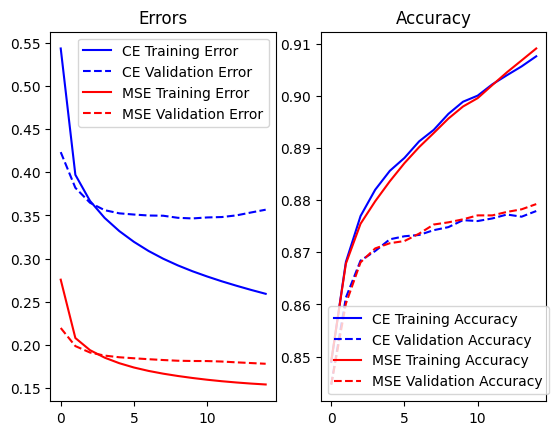

In [28]:
x_values = np.arange(len(ce_tr_acc))
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(x_values, ce_tr_err, label = "CE Training Error", color = 'blue')
ax1.plot(x_values, ce_val_err, label = "CE Validation Error", color= 'blue', linestyle = 'dashed')
ax1.plot(x_values, mse_tr_err, label = "MSE Training Error", color = 'red')
ax1.plot(x_values, mse_val_err, label = "MSE Validation Error", color = 'red', linestyle = 'dashed')
ax1.set_title("Errors")
ax1.legend()
ax2.plot(x_values, ce_tr_acc, label = "CE Training Accuracy", color = 'blue')
ax2.plot(x_values, ce_val_acc, label = "CE Validation Accuracy", color= 'blue', linestyle = 'dashed')
ax2.plot(x_values, mse_tr_acc, label = "MSE Training Accuracy", color = 'red')
ax2.plot(x_values, mse_val_acc, label = "MSE Validation Accuracy", color = 'red', linestyle = 'dashed')
ax2.set_title("Accuracy")
ax2.legend()
fig.show()

## Some other sample models

In [ ]:
no_of_hidden = 4
layer_size = 64
hidden_layer = [layer_size] * no_of_hidden
print(hidden_layer)
model = Classification( _max_epoch = 10,
                        _activation_fun = ActivationFunction("relu"),
                        _initialization_method = InitializationMethod("uniform_xav"),
                        _learning_rate = 0.0001,
                        _batch_size = 64,
                        _optimization_algorithm = OptimizationAlgorithm("nag"))
model.init_weight_and_bias()
tr_err, val_err, tr_acc, val_acc = model.fit(x_train, y_train, x_validation, y_validation)

In [ ]:
#@title Sigmoid Mini GD Large data{vertical-output:true}

model = Classification(_no_of_class=10, 
                       _hidden_layer=[32,32], 
                       _input_layer=784,
                       _initialization_method=InitializationMethod("Xavier"),
                       _learning_rate=0.001,
                       _activation_fun=ActivationFunction("tanh"), 
                       _optimization_algorithm=OptimizationAlgorithm("momentum"),
                       _batch_size = 32,
                       _max_epoch=10)

model.init_weight_and_bias()
tr_err, val_err, tr_acc, val_acc = model.fit(x_train, y_train, x_validation, y_validation)
model.plot_graphs(tr_err, val_err, tr_acc, val_acc)


In [ ]:
wandb.init(project='CS6910_Assignment-1', name='momentum-tanh')
predictions = model.calc_accuracy(x_test, y_test, return_predicted_distribution=True)
wandb.log({"conf_mat" : wandb.plot.confusion_matrix(probs=None,
                    y_true=y_test, preds=np.argmax(predictions, axis=1),
                    class_names=labels)})

wandb.finish()


In [ ]:
model = Classification(_no_of_class=10, 
                       _hidden_layer=[32, 32], 
                       _input_layer=784,
                       _initialization_method=InitializationMethod("uniform_xav"),
                       _learning_rate=0.001,
                       _activation_fun=ActivationFunction("tanh"), 
                       _optimization_algorithm=OptimizationAlgorithm("momentum_gd"),
                       _batch_size = 32,
                       _max_epoch=10,
                       _weight_decay_l2_reg = 0.5)

model.init_weight_and_bias()
model.fit(x_train, y_train)

In [ ]:
model1 = Classification(_no_of_class=10,
                        _hidden_layer = [32, 32],
                        _input_layer = 784,
                        _max_epoch = 5,
                        _activation_fun = ActivationFunction.TAN_H,
                        _initialization_method = InitializationMethod.UNIFORM_XAVIER,
                        _learning_rate = 0.001,
                        _batch_size = 32,
                        _optimization_algorithm = OptimizationAlgorithm.ADAM)
model1.init_weight_and_bias()
tr_err, val_err, tr_acc, val_acc = model1.fit(x_train, y_train, x_validation, y_validation)
model1.plot_graphs(tr_err, val_err, tr_acc, val_acc)

In [ ]:
wandb.init(project='CS6910_Assignment-1', name='tanh_adam')
predictions = model1.calc_accuracy(x_test, y_test, return_predicted_distribution=True)
wandb.log({"conf_mat" : wandb.plot.confusion_matrix(probs=None,
                    y_true=y_test, preds=predictions,
                    class_names=labels)})

wandb.finish()


In [ ]:
#@title ReLU GD Small Data { vertical-output: true}
model1 = Classification(_no_of_class=10, 
                       _hidden_layer=[64, 64, 64], 
                       _input_layer=784,
                       _initialization_method=InitializationMethod.UNIFORM_XAVIER,
                       _learning_rate=0.01,
                       _activation_fun=ActivationFunction.TAN_H, 
                       _optimization_algorithm=OptimizationAlgorithm.GD,
                       _max_epoch=800)

model1.init_weight_and_bias()
tr_err, val_err, tr_acc, val_acc = model1.fit(x_train, y_train, x_validation, y_validation)
model1.plot_graphs(tr_err, val_err, tr_acc, val_acc)

In [ ]:
#@title Sigmoid GD Small data{ vertical-output: true}
model1 = Classification(_no_of_class=10, 
                       _hidden_layer=[64, 64], 
                       _input_layer=784,
                       _initialization_method=InitializationMethod.UNIFORM_XAVIER,
                       _learning_rate=0.01,
                       _activation_fun=ActivationFunction.SIGMOID, 
                       _optimization_algorithm=OptimizationAlgorithm.GD,
                       _max_epoch=2)
model1.init_weight_and_bias()

model1.init_weight_and_bias()
tr_err, val_err, tr_acc, val_acc = model1.fit(x_train, y_train, x_validation, y_validation)
model1.plot_graphs(tr_err, val_err, tr_acc, val_acc)

In [ ]:
#@title Sigmoid Momentum Whole data{vertical-output:true}
model3 = Classification(_no_of_class=10, 
                       _hidden_layer=[32, 32], 
                       _input_layer=784,
                       _initialization_method=InitializationMethod.UNIFORM_XAVIER,
                       _learning_rate=0.01,
                       _activation_fun=ActivationFunction.SIGMOID, 
                       _optimization_algorithm=OptimizationAlgorithm.MOMENTUM_GD,
                       _batch_size = 50,
                       _momentum = 0.9,
                       _max_epoch=2)

model3.init_weight_and_bias()
tr_err, val_err, tr_acc, val_acc = model3.fit(x_train, y_train, x_validation, y_validation)
model3.plot_graphs(tr_err, val_err, tr_acc, val_acc)


In [ ]:
#@title Sigmoid NAG Whole data{vertical-output:true}
model4 = Classification(_no_of_class=10, 
                       _hidden_layer=[32, 32], 
                       _input_layer=784,
                       _initialization_method=InitializationMethod.UNIFORM_XAVIER,
                       _learning_rate=0.01,
                       _activation_fun=ActivationFunction.SIGMOID, 
                       _optimization_algorithm=OptimizationAlgorithm.NAG,
                       _batch_size = 50,
                       _momentum = 0.9,
                       _max_epoch=2)

model4.init_weight_and_bias()
tr_err, val_err, tr_acc, val_acc = model4.fit(x_train, y_train, x_validation, y_validation)
model4.plot_graphs(tr_err, val_err, tr_acc, val_acc)

In [ ]:
#@title Sigmoid SGD whole data{ vertical-output: true}
model5 = Classification(_no_of_class=10, 
                       _hidden_layer=[64, 64], 
                       _input_layer=784,
                       _initialization_method=InitializationMethod.UNIFORM_XAVIER,
                       _learning_rate=0.01,
                       _activation_fun=ActivationFunction.SIGMOID, 
                       _optimization_algorithm=OptimizationAlgorithm.SGD,
                       _max_epoch=10)
model5.init_weight_and_bias()

model5.fit(x_train, y_train)

In [ ]:
#@title Sigmoid RMS whole data{ vertical-output: true}
model6 = Classification(_no_of_class=10, 
                       _hidden_layer=[32, 32], 
                       _input_layer=784,
                       _initialization_method=InitializationMethod.UNIFORM_XAVIER,
                       _learning_rate=0.1,
                       _activation_fun=ActivationFunction.SIGMOID, 
                       _optimization_algorithm=OptimizationAlgorithm.RMS_PROP,
                       _batch_size = 100,
                       _momentum = 0.9,
                       _max_epoch=10)
model6.init_weight_and_bias()

model6.fit(x_train, y_train)